<center><h1>Last_First_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

Name : Ankita Ashok Baleri<br>
USC ID: 7176674754<br>
GitHub ID: Ankitabaleri<br>

### (a) Download Data

Package imports

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import math
import numpy as np
from scipy.io import arff

Get the Vertebral Column Data Set

In [26]:
dataset = arff.loadarff('../data/vertebral_column_data/column_2C_weka.arff')
df = pd.DataFrame(dataset[0])
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,b'Normal'
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,b'Normal'
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,b'Normal'
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,b'Normal'


In [27]:
df["class"] = df["class"].str.decode("utf-8")
df["class"] = df["class"].map({"Abnormal": 1, "Normal": 0})
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

<Figure size 1000x800 with 0 Axes>

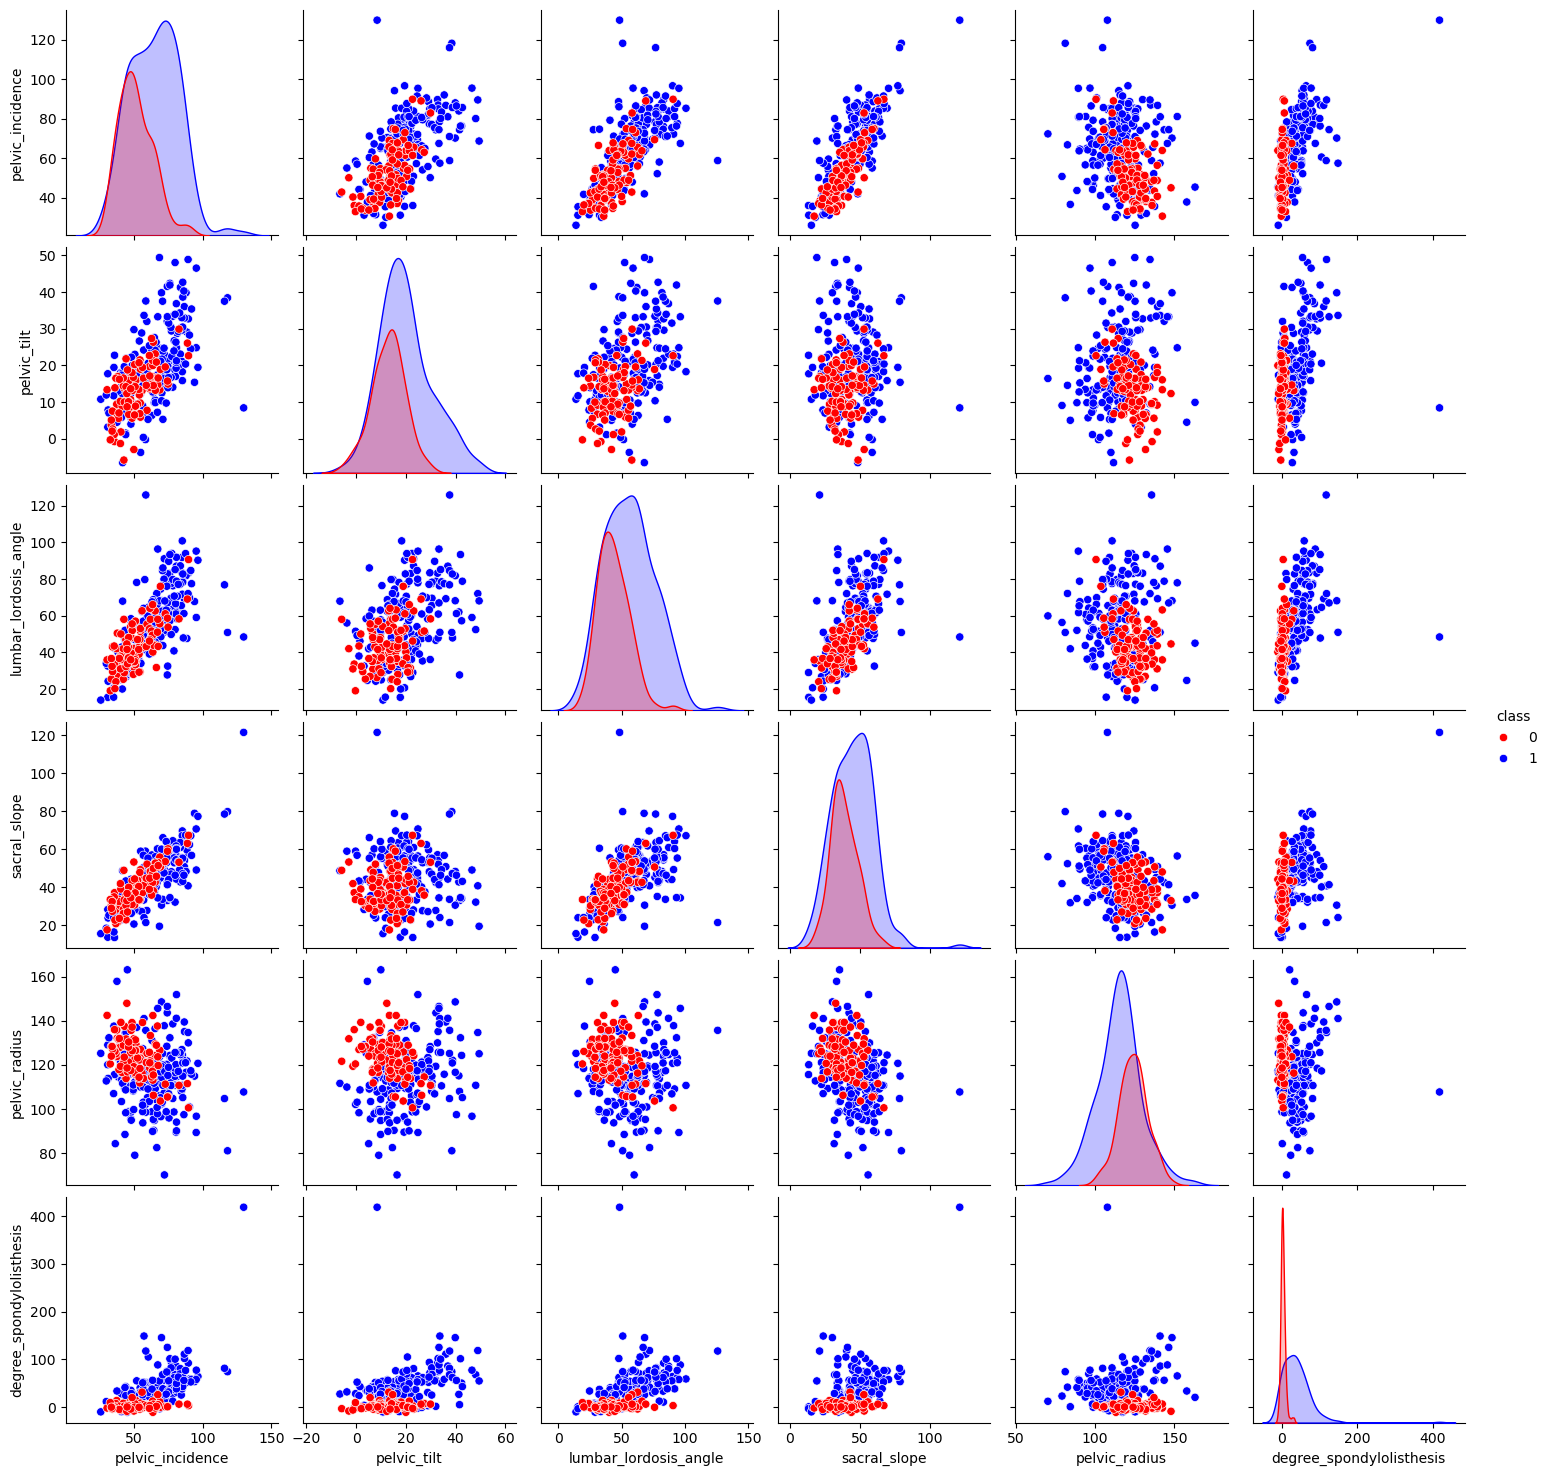

In [28]:
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue="class", palette={0: "red", 1: "blue"})

#### ii. Boxplots

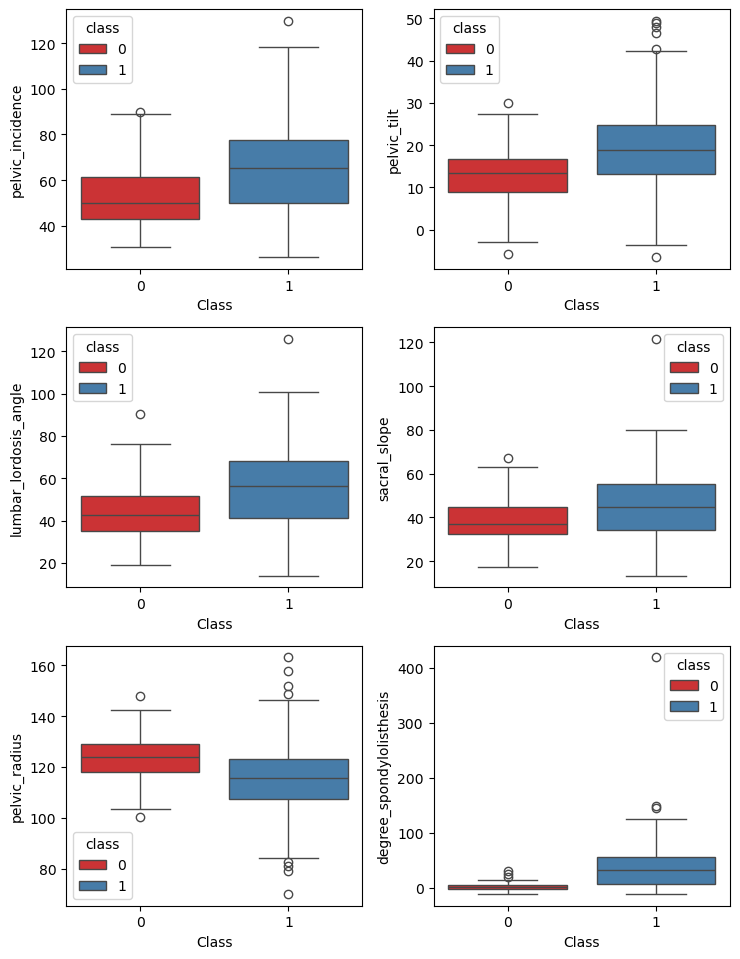

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
for ax, col in zip(axes.flatten(), df.columns[:-1]):
    sns.boxplot(x="class", y=col, data=df, ax=ax, hue="class", palette="Set1")
    ax.set_xlabel("Class")
    ax.set_ylabel(col)
plt.tight_layout(rect=[0, 0, 0.5, 0.97])
plt.show()

#### iii. Split Data Set

In [30]:
class_zero = df[df['class']==0]
class_one = df[df['class']==1]
X_train = (pd.concat([class_zero.iloc[:70,:-1], class_one.iloc[:140,:-1]])).reset_index(drop=True)
y_train = (pd.concat([class_zero.iloc[:70,-1], class_one.iloc[:140,-1]])).reset_index(drop=True)
X_test = (pd.concat([class_zero.iloc[70:,:-1], class_one.iloc[140:,:-1]])).reset_index(drop=True)
y_test = (pd.concat([class_zero.iloc[70:,-1], class_one.iloc[140:,-1]])).reset_index(drop=True)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (210, 6)
y_train shape: (210,)
X_test shape: (100, 6)
y_test shape: (100,)


### (c) Classification

#### i. Euclidean Metric

In [31]:
def get_min_err(errors, ks, start=0):
    min_err_k_values = []
    min_err = min(errors[start:])
    for i in range(0, len(errors)):
        if errors[i] == min_err:
            min_err_k_values.append(ks[i])
    best_k_value = min_err_k_values[0]
    if start == 0 and min_err_k_values[0] == 1 and len(min_err_k_values)>1:
        best_k_value = min_err_k_values[1]
    elif start == 0 and min_err_k_values[0] == 1:
        print("As k=1 has the least error than any other i.e.", min_err," finding second best as it represents the case of overfitting")
        return get_min_err(errors,ks,1)
    return min_err_k_values, min_err, best_k_value

In [32]:
global_alt_min_training_error = 1
global_min_training_error_k = 1
global_min_training_err_metric = "Euclidean"
def get_min_train_metrics(new, metric, k):
    global global_alt_min_training_error
    global global_min_training_error_k
    global global_min_training_err_metric
    if new < global_alt_min_training_error:
        global_alt_min_training_error = new
        global_min_training_error_k = k
        global_min_training_err_metric = metric

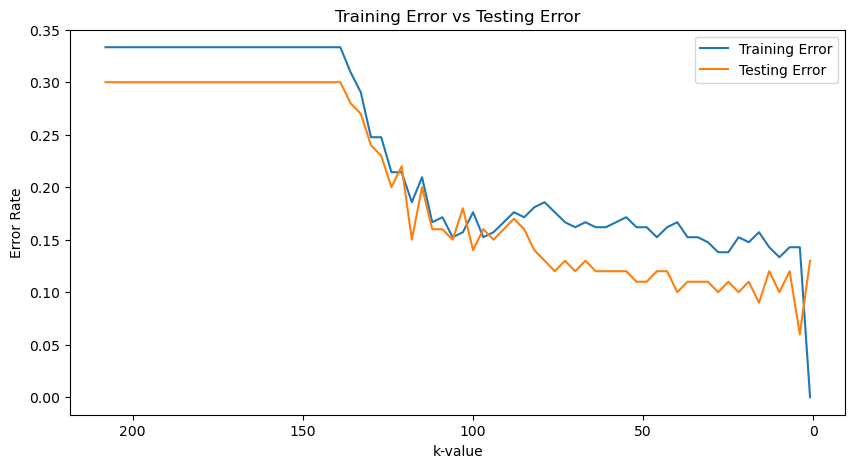

In [33]:

training_error = []
testing_error = []
k_values = [k for k in range(1,209,3)]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    if k!=1:
        get_min_train_metrics(1-accuracy_score(y_train, y_train_pred), "Euclidean", k)
    training_error.append(1-accuracy_score(y_train, y_train_pred))
    testing_error.append(1-accuracy_score(y_test, y_test_pred))
plt.figure(figsize=(10, 5))
plt.plot(k_values, training_error, label="Training Error")
plt.plot(k_values, testing_error, label="Testing Error")
plt.gca().invert_xaxis()
plt.ylabel("Error Rate")
plt.xlabel("k-value")
plt.title("Training Error vs Testing Error")
plt.legend()
plt.show()

In [34]:
min_euclidean_ks, min_euclidean_test_err, best_euclidean_k = get_min_err(testing_error, k_values)
print("With euclidean distance, ks with minimum testing error of ", min_euclidean_test_err," is/are: ", min_euclidean_ks)
print("With euclidean distance, the best k* value is:",best_euclidean_k," with testing error:",min_euclidean_test_err)

With euclidean distance, ks with minimum testing error of  0.06000000000000005  is/are:  [4]
With euclidean distance, the best k* value is: 4  with testing error: 0.06000000000000005


#### ii. Test Data

In [35]:
knn = KNeighborsClassifier(n_neighbors=best_euclidean_k, metric='euclidean')
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)
tp_rate = recall_score(y_test, y_test_pred)
tn_rate = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
prec = precision_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
print("Confustion Matrix:")
print(conf_matrix)
print("True Positive rate: ", tp_rate)
print("True Negative rate: ", tn_rate)
print("Precision: ", prec)
print("F-1 score: ", f1)

Confustion Matrix:
[[25  5]
 [ 1 69]]
True Positive rate:  0.9857142857142858
True Negative rate:  0.8333333333333334
Precision:  0.9324324324324325
F-1 score:  0.9583333333333334


#### iii. Learning Curve

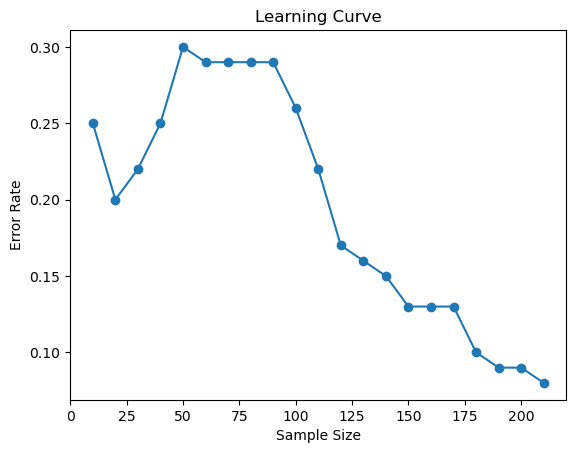

In [36]:
sizes = [size for size in range(10,211,10)]
best_sample_testing_error=[]
best_sample_ks = []
for size in sizes:
    X_train_sample = (pd.concat([class_zero.iloc[:size//3,:-1], class_one.iloc[:size-size//3,:-1]])).reset_index(drop=True)
    y_train_sample = (pd.concat([class_zero.iloc[:size//3,-1], class_one.iloc[:size-size//3,-1]])).reset_index(drop=True)
    local_best_test_err = 1
    local_best_k = []
    for k in range(1,min(197,size+1),5):
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(X_train_sample, y_train_sample)
        y_test_pred = knn.predict(X_test)
        if k!=1:
            y_train_pred = knn.predict(X_train)
            get_min_train_metrics(1-accuracy_score(y_train, y_train_pred), "Euclidean with sample size", k)        
        err = 1-accuracy_score(y_test, y_test_pred)
        if local_best_test_err > err:
            local_best_test_err = err
            local_best_k = k
    best_sample_testing_error.append(local_best_test_err)
    best_sample_ks.append(local_best_k)
plt.plot(sizes, best_sample_testing_error, marker="o")
plt.ylabel("Error Rate")
plt.xlabel("Sample Size")
plt.title("Learning Curve")
plt.show()

In [37]:
best_euclidean_sample_index = best_sample_testing_error.index(min(best_sample_testing_error))
print("With euclidean distance, for different sample sizes, the best testing error achieved is:",best_sample_testing_error[best_euclidean_sample_index]," at k=",best_sample_ks[best_euclidean_sample_index]," for sample size:",sizes[best_euclidean_sample_index])

With euclidean distance, for different sample sizes, the best testing error achieved is: 0.07999999999999996  at k= 6  for sample size: 210


### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [38]:
summary_df = {}
summary_df['Distance'] = []
summary_df['k']=[]
summary_df['Testing Error'] = []
ks = [k for k in range(1,197,5)]
manhattan_test_err = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k, p=1)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    if k!=1:
        y_train_pred = knn.predict(X_train)
        get_min_train_metrics(1-accuracy_score(y_train, y_train_pred), "Manhattan", k)        
    manhattan_test_err.append(1-accuracy_score(y_test, y_test_pred))
best_manhattan_index = manhattan_test_err.index(min(manhattan_test_err))
min_manhattan_ks, min_manhattan_test_err, best_manhattan_k = get_min_err(manhattan_test_err, ks)
summary_df['Distance'].append('Manhattan')
summary_df['k'].append(best_manhattan_k)
summary_df['Testing Error'].append(min_manhattan_test_err)
print("With manhattan distance, ks with minimum testing error of ", min_manhattan_test_err," is/are: ", min_manhattan_ks)
#choosing best k with min testing error. If k=1(as it represents overfitting), choosing the next minimum as our training set size is less.
print("With manhattan distance, the best k* value is:",best_manhattan_k," with testing error:",min_manhattan_test_err)

With manhattan distance, ks with minimum testing error of  0.10999999999999999  is/are:  [1, 6, 11, 26]
With manhattan distance, the best k* value is: 6  with testing error: 0.10999999999999999


Here, choosing k* as 6 as k=1 represents a case of overfitting

##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [39]:
log_ps = [round(i,1) for i in np.arange(0.1, 1.1, 0.1)]
p_vals = [10**i for i in log_ps]
minkowski_log_test_err = []
for p in p_vals:
    knn = KNeighborsClassifier(n_neighbors=best_manhattan_k, p=p)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    if k!=1:
        y_train_pred = knn.predict(X_train)
        get_min_train_metrics(1-accuracy_score(y_train, y_train_pred), "Minkowski with log", k)        
    minkowski_log_test_err.append(1-accuracy_score(y_test, y_test_pred))
min_minkowski_log_test_err = min(minkowski_log_test_err)
min_manhattan_log_ps = []
for i in range(0,len(minkowski_log_test_err)):
    if minkowski_log_test_err[i] == min_minkowski_log_test_err:
        min_manhattan_log_ps.append(log_ps[i])
summary_df['Distance'].append('Minkowski log10(p)')
summary_df['k'].append(best_manhattan_k)
summary_df['Testing Error'].append(min_minkowski_log_test_err)
print("With minkowski log distance, the minimum testing error was ",min_minkowski_log_test_err," at log10(p)=",min_manhattan_log_ps)

With minkowski log distance, the minimum testing error was  0.06000000000000005  at log10(p)= [0.6]


##### C. Chebyshev Distance With p -> infinity.

In [40]:
chebyshev_test_err = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k, p=math.inf)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    if k!=1:
        y_train_pred = knn.predict(X_train)
        get_min_train_metrics(1-accuracy_score(y_train, y_train_pred), "Chebyshev", k)        
    chebyshev_test_err.append(1-accuracy_score(y_test, y_test_pred))
min_chebyshev_ks, min_chebyshev_test_err, best_chebyshev_k = get_min_err(chebyshev_test_err, ks)
summary_df['Distance'].append('Chebyshev')
summary_df['k'].append(best_chebyshev_k)
summary_df['Testing Error'].append(min_chebyshev_test_err)
print("With chebyshev distance, ks with minimum testing error of ", min_chebyshev_test_err," is/are: ", min_chebyshev_ks)
print("With chebyshev distance, the best k* value is:",best_chebyshev_k," with testing error:",min_chebyshev_test_err)

With chebyshev distance, ks with minimum testing error of  0.07999999999999996  is/are:  [16]
With chebyshev distance, the best k* value is: 16  with testing error: 0.07999999999999996


#### ii. Mahalanobis Distance.

In [41]:
cov_matrix = np.cov(X_train, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mahalanobis_test_err = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': inv_cov_matrix})
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    if k!=1:
        y_train_pred = knn.predict(X_train)
        get_min_train_metrics(1-accuracy_score(y_train, y_train_pred), "Mahalanobis", k)        
    mahalanobis_test_err.append(1-accuracy_score(y_test, y_test_pred))
min_mahalanobis_ks, min_mahalanobis_test_err, best_mahalanobis_k = get_min_err(mahalanobis_test_err, ks)
summary_df['Distance'].append('Mahalanobis')
summary_df['k'].append(best_mahalanobis_k)
summary_df['Testing Error'].append(min_mahalanobis_test_err)
print("With mahalanobis distance, ks with minimum testing error of ", min_mahalanobis_test_err," is/are: ", min_mahalanobis_ks)
print("With mahalanobis distance, the best k* value is:",best_mahalanobis_k," with testing error:",min_mahalanobis_test_err)

As k=1 has the least error than any other i.e. 0.14  finding second best as it represents the case of overfitting
With mahalanobis distance, ks with minimum testing error of  0.16000000000000003  is/are:  [6]
With mahalanobis distance, the best k* value is: 6  with testing error: 0.16000000000000003


In [42]:
#error by default rounding off to 2 decimal values
print(pd.DataFrame(summary_df))

             Distance   k  Testing Error
0           Manhattan   6           0.11
1  Minkowski log10(p)   6           0.06
2           Chebyshev  16           0.08
3         Mahalanobis   6           0.16


### (e) Weighted Decision

In [43]:
weighted_euclidean_err = []
weighted_manhattan_err = []
weighted_chebyshev_err = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights = 'distance')
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    if k!=1:
        y_train_pred = knn.predict(X_train)
        get_min_train_metrics(1-accuracy_score(y_train, y_train_pred), "Weighted Euclidean", k)        
    weighted_euclidean_err.append(1-accuracy_score(y_test, y_test_pred))
    knn = KNeighborsClassifier(n_neighbors=k, p=1, weights = 'distance')
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    if k!=1:
        y_train_pred = knn.predict(X_train)
        get_min_train_metrics(1-accuracy_score(y_train, y_train_pred), "Weighted Manhattan", k)        
    weighted_manhattan_err.append(1-accuracy_score(y_test, y_test_pred))
    knn = KNeighborsClassifier(n_neighbors=k, p=math.inf, weights = 'distance')
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    if k!=1:
        y_train_pred = knn.predict(X_train)
        get_min_train_metrics(1-accuracy_score(y_train, y_train_pred), "Weighted Chebyshev", k)        
    weighted_chebyshev_err.append(1-accuracy_score(y_test, y_test_pred))
min_weighted_euclidean_ks, min_weighted_euclidean_test_err, best_weighted_euclidean_k = get_min_err(weighted_euclidean_err, ks)
min_weighted_manhattan_ks, min_weighted_manhattan_test_err, best_weighted_manhattan_k = get_min_err(weighted_manhattan_err, ks)
min_weighted_chebyshev_ks, min_weighted_chebyshev_test_err, best_weighted_chebyshev_k = get_min_err(weighted_chebyshev_err, ks)
print("With euclidean weighted distance best/minimum testing error can be found at following ks:", min_weighted_euclidean_ks)
print("With manhattan weighted distance best/minimum testing error can be found at following ks:", min_weighted_manhattan_ks)
print("With chebyshev weighted distance best/minimum testing error can be found at following ks:", min_weighted_chebyshev_ks)

#choosing best k with min testing error. If k=1(as it represents overfitting), choosing the next minimum as our training set size is less.
print("Final Weighted Decisions:")
print("With euclidean, the best testing error was ",min_weighted_euclidean_test_err," at best k value=",best_weighted_euclidean_k)
print("With manhattan, the best testing error was ",min_weighted_manhattan_test_err," at best k value=",best_weighted_manhattan_k)
print("With chebyshev, the best testing error was ",min_weighted_chebyshev_test_err," at best k value=",best_weighted_chebyshev_k)


With euclidean weighted distance best/minimum testing error can be found at following ks: [6]
With manhattan weighted distance best/minimum testing error can be found at following ks: [26]
With chebyshev weighted distance best/minimum testing error can be found at following ks: [16, 31, 36, 41, 61]
Final Weighted Decisions:
With euclidean, the best testing error was  0.09999999999999998  at best k value= 6
With manhattan, the best testing error was  0.09999999999999998  at best k value= 26
With chebyshev, the best testing error was  0.10999999999999999  at best k value= 16


### (f) Training Error Rate

In [44]:
#When k=1, we get the minimum training error i.e. 0 as it calculates the distance with itself. This is true for all the above KNN models. This can be even viewed by the train vs test error graph from euclidean metrics
#Reporting the second best error
print("The minimum training error found so far is:", global_alt_min_training_error, " for k=",global_min_training_error_k," with the metric:", global_min_training_err_metric)

The minimum training error found so far is: 0.0  for k= 6  with the metric: Weighted Euclidean


# References

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

https://seaborn.pydata.org/generated/seaborn.pairplot.html

https://seaborn.pydata.org/generated/seaborn.boxplot.html